In [92]:
%reload_ext autoreload
%autoreload 2

In [193]:
import os, sys
import pprint
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.db_utils import engine
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import src.data_utils as data_utils
import src.plot_utils as plot_utils


In [94]:
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [95]:
# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query,engine)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [96]:
df.shape

(150001, 55)

In [97]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [98]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

In [99]:
# count number of null values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [100]:
# percentage of missing data
data_utils.percent_missing(df)

12.5

In [101]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [102]:
# converting to datetime dtype
df['Start'] =pd.to_datetime(df['Start'])
df['End'] =pd.to_datetime(df['End'])

In [103]:
# replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Bearer_Id', 'Start', 'Start_ms', 'End', 'End_ms', 'Dur._(ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last_Location_Name', 'Avg_RTT_DL_(ms)',
       'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)',
       'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)',
       'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
       '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)',
       'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)',
       'HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur._(ms).1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_125000B_<_Vol_DL',
       'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
       'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
       'Nb_of_sec_with_37500B_<_Vol_UL',
       'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
       'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',


In [126]:
#  dropping unnecessary columns
df = df[['Bearer_Id', 'Start', 
        #  'Start_ms', 'End_ms','IMSI','IMEI','Last_Location_Name',
         'End', 'Dur._(ms)', 
       'MSISDN/Number',   'Avg_RTT_DL_(ms)',
       'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)',
       'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)',
       'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
       '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)',
       'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)',
       'HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur._(ms).1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_125000B_<_Vol_DL',
       'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
       'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
       'Nb_of_sec_with_37500B_<_Vol_UL',
       'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
       'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
       'Nb_of_sec_with_Vol_DL_<_6250B', 'Nb_of_sec_with_Vol_UL_<_1250B',
       'Social_Media_DL_(Bytes)', 'Social_Media_UL_(Bytes)',
       'Google_DL_(Bytes)', 'Google_UL_(Bytes)', 'Email_DL_(Bytes)',
       'Email_UL_(Bytes)', 'Youtube_DL_(Bytes)', 'Youtube_UL_(Bytes)',
       'Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)', 'Gaming_DL_(Bytes)',
       'Gaming_UL_(Bytes)', 'Other_DL_(Bytes)', 'Other_UL_(Bytes)',
       'Total_UL_(Bytes)', 'Total_DL_(Bytes)']]

## Top 10 handsets

Text(0, 0.5, 'Handset Type')

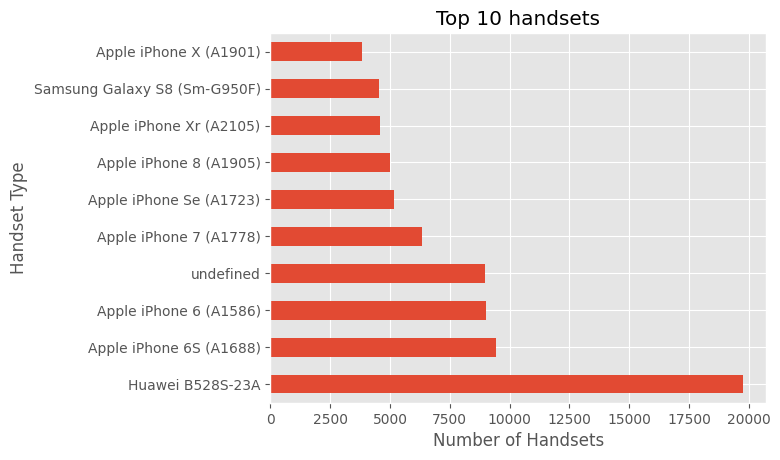

In [105]:
# get top 10 handsets used by customers

top_10_handsets = df['Handset_Type'].value_counts().head(10)
ax = top_10_handsets.plot(kind='barh', title='Top 10 handsets')

ax.set_xlabel('Number of Handsets'); ax.set_ylabel('Handset Type')

# Top 3 Handset Manufacturers

Text(0, 0.5, 'Number of Handsets')

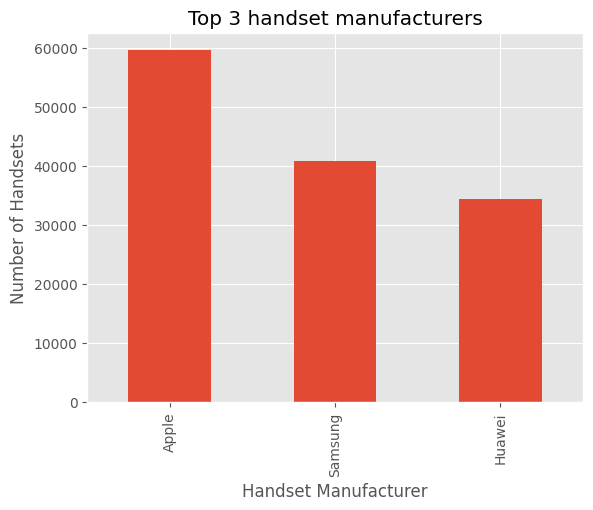

In [106]:
top_3_handsets_manufacturers = df['Handset_Manufacturer'].value_counts().head(3)
ax = top_3_handsets_manufacturers.plot(kind='bar', title='Top 3 handset manufacturers')

ax.set_xlabel('Handset Manufacturer'); ax.set_ylabel('Number of Handsets')

In [107]:
df['Handset_Manufacturer']

0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
150000         None
Name: Handset_Manufacturer, Length: 150001, dtype: object

# Identify the top 5 handsets per top 3 handset manufacturer

Text(0.5, 0, 'Number of Handsets')

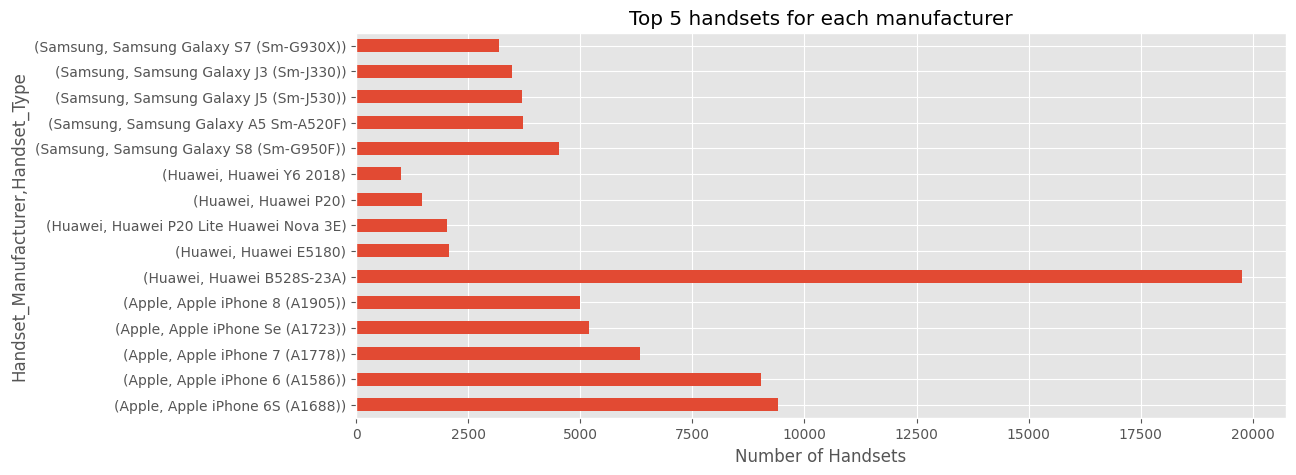

In [108]:
# Filter the DataFrame for top 3 manufacturers
filtered_df = df[df['Handset_Manufacturer'].isin(top_3_handsets_manufacturers.index.tolist())]

# # Group by 'Handset Manufacturer' and get top 5 handsets for each manufacturer
ax = filtered_df.groupby('Handset_Manufacturer')['Handset_Type']\
    .value_counts()\
    .groupby(level=0, group_keys=False)\
    .nlargest(5) \
    .plot(kind='barh', figsize=(12,5), title='Top 5 handsets for each manufacturer')

ax.set_xlabel('Number of Handsets')

In [109]:
df.head()

,Bearer_Id,Start,End,Dur._(ms),IMSI,MSISDN/Number,IMEI,Last_Location_Name,Avg_RTT_DL_(ms),Avg_RTT_UL_(ms),Avg_Bearer_TP_DL_(kbps),Avg_Bearer_TP_UL_(kbps),TCP_DL_Retrans._Vol_(Bytes),TCP_UL_Retrans._Vol_(Bytes),DL_TP_<_50_Kbps_(%),50_Kbps_<_DL_TP_<_250_Kbps_(%),250_Kbps_<_DL_TP_<_1_Mbps_(%),DL_TP_>_1_Mbps_(%),UL_TP_<_10_Kbps_(%),10_Kbps_<_UL_TP_<_50_Kbps_(%),50_Kbps_<_UL_TP_<_300_Kbps_(%),UL_TP_>_300_Kbps_(%),HTTP_DL_(Bytes),HTTP_UL_(Bytes),Activity_Duration_DL_(ms),Activity_Duration_UL_(ms),Dur._(ms).1,Handset_Manufacturer,Handset_Type,Nb_of_sec_with_125000B_<_Vol_DL,Nb_of_sec_with_1250B_<_Vol_UL_<_6250B,Nb_of_sec_with_31250B_<_Vol_DL_<_125000B,Nb_of_sec_with_37500B_<_Vol_UL,Nb_of_sec_with_6250B_<_Vol_DL_<_31250B,Nb_of_sec_with_6250B_<_Vol_UL_<_37500B,Nb_of_sec_with_Vol_DL_<_6250B,Nb_of_sec_with_Vol_UL_<_1250B,Social_Media_DL_(Bytes),Social_Media_UL_(Bytes),Google_DL_(Bytes),Google_UL_(Bytes),Email_DL_(Bytes),Email_UL_(Bytes),Youtube_DL_(Bytes),Youtube_UL_(Bytes),Netflix_DL_(Bytes),Netflix_UL_(Bytes),Gaming_DL_(Bytes),Gaming_UL_(Bytes),Other_DL_(Bytes),Other_UL_(Bytes),Total_UL_(Bytes),Total_DL_(Bytes)
0,1.311448e+19,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Aggregate per user the following information in the column  
    number of xDR sessions
    Session duration
    the total download (DL) and upload (UL) data
    the total data volume (in Bytes) during this session for each application



In [127]:
user_summary = df.groupby('MSISDN/Number').agg({
    'Bearer_Id': 'count',  # Number of xDR sessions
    'Dur._(ms)': 'sum',   # Total session duration
    'Total_UL_(Bytes)': 'sum',  # Total upload data
    'Total_DL_(Bytes)': 'sum',  # Total download data
    'Social_Media_DL_(Bytes)': 'sum',  # Total Social Media download data
    'Social_Media_UL_(Bytes)': 'sum',  # Total Social Media upload data
    # ... add similar lines for other applications
})

user_summary

,Bearer_Id,Dur._(ms),Total_UL_(Bytes),Total_DL_(Bytes),Social_Media_DL_(Bytes),Social_Media_UL_(Bytes)
MSISDN/Number,,,,,,
3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2206504.0,25631.0
3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2598548.0,62017.0
3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3148004.0,47619.0
3.360101e+10,1,49878.0,20327526.0,4.019932e+08,251469.0,28825.0
3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2861230.0,51312.0
...,...,...,...,...,...,...
3.379000e+10,1,8810.0,26716429.0,6.879252e+08,234320.0,65863.0
3.379000e+10,1,140988.0,35732243.0,4.445751e+08,442214.0,56355.0
3.197021e+12,1,877385.0,37295915.0,1.948281e+08,668596.0,46628.0


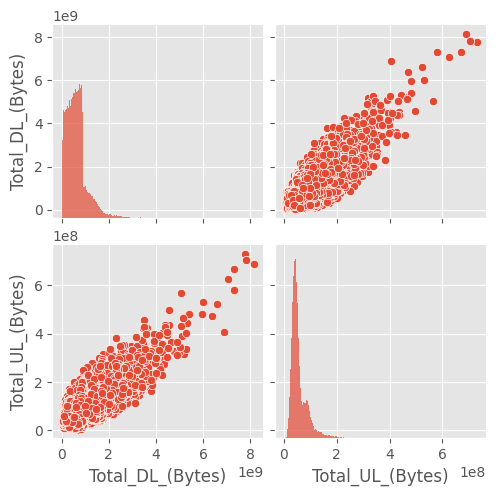

In [128]:
sns.pairplot(data=user_summary,
             vars=['Total_DL_(Bytes)','Total_UL_(Bytes)'], 
             )

In [129]:
df.dtypes

Bearer_Id                                          float64
Start                                       datetime64[ns]
End                                         datetime64[ns]
Dur._(ms)                                          float64
MSISDN/Number                                      float64
Avg_RTT_DL_(ms)                                    float64
Avg_RTT_UL_(ms)                                    float64
Avg_Bearer_TP_DL_(kbps)                            float64
Avg_Bearer_TP_UL_(kbps)                            float64
TCP_DL_Retrans._Vol_(Bytes)                        float64
TCP_UL_Retrans._Vol_(Bytes)                        float64
DL_TP_<_50_Kbps_(%)                                float64
50_Kbps_<_DL_TP_<_250_Kbps_(%)                     float64
250_Kbps_<_DL_TP_<_1_Mbps_(%)                      float64
DL_TP_>_1_Mbps_(%)                                 float64
UL_TP_<_10_Kbps_(%)                                float64
10_Kbps_<_UL_TP_<_50_Kbps_(%)                      float

In [130]:
print(df.shape)
# iterating through each column and dropping a column if it has > 30% missing values
cols_to_be_dropped= []
for col in df.columns:
    missing_percentage  = data_utils.percent_missing(df[col])
    if(missing_percentage > 30):
        print(f'{col} has => {missing_percentage} % missing')
        cols_to_be_dropped.append(col)
df_cleaned = df.drop(cols_to_be_dropped,axis=1)        
print(df_cleaned.shape)

(150001, 50)
TCP_DL_Retrans._Vol_(Bytes) has => 58.76 % missing
TCP_UL_Retrans._Vol_(Bytes) has => 64.43 % missing
HTTP_DL_(Bytes) has => 54.32 % missing
HTTP_UL_(Bytes) has => 54.54 % missing
Nb_of_sec_with_125000B_<_Vol_DL has => 65.02 % missing
Nb_of_sec_with_1250B_<_Vol_UL_<_6250B has => 61.93 % missing
Nb_of_sec_with_31250B_<_Vol_DL_<_125000B has => 62.39 % missing
Nb_of_sec_with_37500B_<_Vol_UL has => 86.84 % missing
Nb_of_sec_with_6250B_<_Vol_DL_<_31250B has => 58.88 % missing
Nb_of_sec_with_6250B_<_Vol_UL_<_37500B has => 74.56 % missing
(150001, 40)


In [117]:
df_cleaned.dtypes

Bearer_Id                                float64
Start                             datetime64[ns]
End                               datetime64[ns]
Dur._(ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last_Location_Name                        object
Avg_RTT_DL_(ms)                          float64
Avg_RTT_UL_(ms)                          float64
Avg_Bearer_TP_DL_(kbps)                  float64
Avg_Bearer_TP_UL_(kbps)                  float64
DL_TP_<_50_Kbps_(%)                      float64
50_Kbps_<_DL_TP_<_250_Kbps_(%)           float64
250_Kbps_<_DL_TP_<_1_Mbps_(%)            float64
DL_TP_>_1_Mbps_(%)                       float64
UL_TP_<_10_Kbps_(%)                      float64
10_Kbps_<_UL_TP_<_50_Kbps_(%)            float64
50_Kbps_<_UL_TP_<_300_Kbps_(%)           float64
UL_TP_>_300_Kbps_(%)                     float64
Activity_Duration_DL

In [188]:
df_cleaned.head(10)

,Bearer_Id,Start,End,Dur._(ms),MSISDN/Number,Avg_RTT_DL_(ms),Avg_RTT_UL_(ms),Avg_Bearer_TP_DL_(kbps),Avg_Bearer_TP_UL_(kbps),DL_TP_<_50_Kbps_(%),50_Kbps_<_DL_TP_<_250_Kbps_(%),250_Kbps_<_DL_TP_<_1_Mbps_(%),DL_TP_>_1_Mbps_(%),UL_TP_<_10_Kbps_(%),10_Kbps_<_UL_TP_<_50_Kbps_(%),50_Kbps_<_UL_TP_<_300_Kbps_(%),UL_TP_>_300_Kbps_(%),Activity_Duration_DL_(ms),Activity_Duration_UL_(ms),Dur._(ms).1,Handset_Manufacturer,Handset_Type,Nb_of_sec_with_Vol_DL_<_6250B,Nb_of_sec_with_Vol_UL_<_1250B,Social_Media_DL_(Bytes),Social_Media_UL_(Bytes),Google_DL_(Bytes),Google_UL_(Bytes),Email_DL_(Bytes),Email_UL_(Bytes),Youtube_DL_(Bytes),Youtube_UL_(Bytes),Netflix_DL_(Bytes),Netflix_UL_(Bytes),Gaming_DL_(Bytes),Gaming_UL_(Bytes),Other_DL_(Bytes),Other_UL_(Bytes),Total_UL_(Bytes),Total_DL_(Bytes)
0,1.311448e+19,2019-04-04 12:01:00,2019-04-25 14:35:00,1823652.0,3.366496e+10,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,2019-04-25 08:15:00,1365104.0,3.368185e+10,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,2019-04-25 11:58:00,1361762.0,3.376063e+10,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,2019-04-25 07:36:00,1321509.0,3.375034e+10,45.0,5.0,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,2019-04-25 10:40:00,1089009.0,3.369980e+10,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,2019-04-12 21:37:00,2019-04-25 08:08:00,1074638.0,3.366819e+10,45.0,5.0,70.0,54.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22639.0,22700.0,1.074638e+09,undefined,undefined,112.0,118.0,3148833.0,51181.0,10351530.0,2582603.0,1980032.0,922378.0,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,2019-04-13 08:41:00,2019-04-25 08:16:00,1035261.0,3.366537e+10,102.0,5.0,22.0,38.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,9785.0,316210.0,1.035262e+09,Huawei,Huawei Mate 20 Lite,33.0,655.0,1623509.0,1482.0,1837897.0,3068975.0,1838947.0,252032.0,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,2019-04-14 02:11:00,2019-04-25 02:26:00,951292.0,3.376349e+10,39.0,18.0,3698.0,416.0,99.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,70832.0,74477.0,9.512929e+08,undefined,undefined,708.0,666.0,3103940.0,57463.0,1304524.0,2568189.0,2987408.0,512696.0,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,2019-04-14 12:48:00,2019-04-25 10:22:00,941634.0,3.369874e+10,45.0,5.0,46.0,49.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,162472.0,176488.0,9.416348e+08,Samsung,Samsung Galaxy A8 (2018),794.0,826.0,342043.0,30582.0,7560820.0,1341279.0,3014208.0,365861.0,18436641.0,10860867.0,10587264.0,846

In [133]:
df_cleaned.columns

Index(['Bearer_Id', 'Start', 'End', 'Dur._(ms)', 'MSISDN/Number',
       'Avg_RTT_DL_(ms)', 'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)',
       'Avg_Bearer_TP_UL_(kbps)', 'DL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_DL_TP_<_250_Kbps_(%)', '250_Kbps_<_DL_TP_<_1_Mbps_(%)',
       'DL_TP_>_1_Mbps_(%)', 'UL_TP_<_10_Kbps_(%)',
       '10_Kbps_<_UL_TP_<_50_Kbps_(%)', '50_Kbps_<_UL_TP_<_300_Kbps_(%)',
       'UL_TP_>_300_Kbps_(%)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur._(ms).1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_Vol_DL_<_6250B',
       'Nb_of_sec_with_Vol_UL_<_1250B', 'Social_Media_DL_(Bytes)',
       'Social_Media_UL_(Bytes)', 'Google_DL_(Bytes)', 'Google_UL_(Bytes)',
       'Email_DL_(Bytes)', 'Email_UL_(Bytes)', 'Youtube_DL_(Bytes)',
       'Youtube_UL_(Bytes)', 'Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)',
       'Gaming_DL_(Bytes)', 'Gaming_UL_(Bytes)', 'Other_DL_(Bytes)',
       'Other_UL_(Bytes)', 'Total_UL_(Bytes)', 'Total_DL_(By

In [166]:
# using mode to fill the missing values for phone numbers, handset type, handset manufacturer
df_cleaned['MSISDN/Number'].fillna(df_cleaned['MSISDN/Number'].mode()[0],inplace=True)
df_cleaned['Handset_Type'].fillna(df_cleaned['Handset_Type'].mode()[0],inplace=True)
df_cleaned['Handset_Manufacturer'].fillna(df_cleaned['Handset_Manufacturer'].mode()[0],inplace=True)
# df['Handset_Type'].isna().sum()

0

In [170]:
df_cleaned.isna().sum().sort_values(ascending=False)

Avg_RTT_DL_(ms)                   27828
Avg_RTT_UL_(ms)                   27811
Bearer_Id                           990
Nb_of_sec_with_Vol_UL_<_1250B       792
10_Kbps_<_UL_TP_<_50_Kbps_(%)       791
UL_TP_>_300_Kbps_(%)                791
50_Kbps_<_UL_TP_<_300_Kbps_(%)      791
UL_TP_<_10_Kbps_(%)                 791
Nb_of_sec_with_Vol_DL_<_6250B       754
50_Kbps_<_DL_TP_<_250_Kbps_(%)      753
250_Kbps_<_DL_TP_<_1_Mbps_(%)       753
DL_TP_>_1_Mbps_(%)                  753
DL_TP_<_50_Kbps_(%)                 753
Gaming_DL_(Bytes)                     0
Youtube_UL_(Bytes)                    0
Email_DL_(Bytes)                      0
Total_UL_(Bytes)                      0
Email_UL_(Bytes)                      0
Youtube_DL_(Bytes)                    0
Netflix_UL_(Bytes)                    0
Netflix_DL_(Bytes)                    0
Other_UL_(Bytes)                      0
Other_DL_(Bytes)                      0
Gaming_UL_(Bytes)                     0
Google_DL_(Bytes)                     0


In [191]:
# using median to fill the missing values for Avg_RTT_UL_(ms), Avg_RTT_DL_(ms),Nb_of_sec_with_Vol_UL_<_1250B,UL_TP_>_300_Kbps_(%)
df_cleaned['Avg_RTT_UL_(ms)'].fillna(df_cleaned['Avg_RTT_UL_(ms)'].median(),inplace=True)
df_cleaned['Avg_RTT_DL_(ms)'].fillna(df_cleaned['Avg_RTT_DL_(ms)'].median(),inplace=True)
df_cleaned['Nb_of_sec_with_Vol_UL_<_1250B'].fillna(df_cleaned['Nb_of_sec_with_Vol_UL_<_1250B'].median(),inplace=True)
df_cleaned['UL_TP_>_300_Kbps_(%)'].fillna(df_cleaned['UL_TP_>_300_Kbps_(%)'].median(),inplace=True)
df_cleaned.isna().sum().sort_values(ascending=False)

Bearer_Id                         990
50_Kbps_<_UL_TP_<_300_Kbps_(%)    791
10_Kbps_<_UL_TP_<_50_Kbps_(%)     791
UL_TP_<_10_Kbps_(%)               791
Nb_of_sec_with_Vol_DL_<_6250B     754
DL_TP_<_50_Kbps_(%)               753
250_Kbps_<_DL_TP_<_1_Mbps_(%)     753
50_Kbps_<_DL_TP_<_250_Kbps_(%)    753
DL_TP_>_1_Mbps_(%)                753
Netflix_DL_(Bytes)                  0
Netflix_UL_(Bytes)                  0
Gaming_DL_(Bytes)                   0
Social_Media_DL_(Bytes)             0
Gaming_UL_(Bytes)                   0
Other_DL_(Bytes)                    0
Other_UL_(Bytes)                    0
Youtube_UL_(Bytes)                  0
Youtube_DL_(Bytes)                  0
Email_UL_(Bytes)                    0
Email_DL_(Bytes)                    0
Google_UL_(Bytes)                   0
Google_DL_(Bytes)                   0
Total_UL_(Bytes)                    0
Social_Media_UL_(Bytes)             0
Handset_Manufacturer                0
Nb_of_sec_with_Vol_UL_<_1250B       0
Handset_Type

# Univariate Analysis

In [192]:
df_cleaned.describe()

,Bearer_Id,Start,End,Dur._(ms),MSISDN/Number,Avg_RTT_DL_(ms),Avg_RTT_UL_(ms),Avg_Bearer_TP_DL_(kbps),Avg_Bearer_TP_UL_(kbps),DL_TP_<_50_Kbps_(%),50_Kbps_<_DL_TP_<_250_Kbps_(%),250_Kbps_<_DL_TP_<_1_Mbps_(%),DL_TP_>_1_Mbps_(%),UL_TP_<_10_Kbps_(%),10_Kbps_<_UL_TP_<_50_Kbps_(%),50_Kbps_<_UL_TP_<_300_Kbps_(%),UL_TP_>_300_Kbps_(%),Activity_Duration_DL_(ms),Activity_Duration_UL_(ms),Dur._(ms).1,Nb_of_sec_with_Vol_DL_<_6250B,Nb_of_sec_with_Vol_UL_<_1250B,Social_Media_DL_(Bytes),Social_Media_UL_(Bytes),Google_DL_(Bytes),Google_UL_(Bytes),Email_DL_(Bytes),Email_UL_(Bytes),Youtube_DL_(Bytes),Youtube_UL_(Bytes),Netflix_DL_(Bytes),Netflix_UL_(Bytes),Gaming_DL_(Bytes),Gaming_UL_(Bytes),Other_DL_(Bytes),Other_UL_(Bytes),Total_UL_(Bytes),Total_DL_(Bytes)
count,1.490100e+05,150000,150000,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,149246.000000,150000.000000,1.500000e+05,150000.00000,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,2019-04-26 12:36:09.616800256,2019-04-27 17:39:38.703200256,1.046086e+05,4.182420e+10,97.774807,15.315100,13300.045927,1770.428647,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078507,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4001.992613,1.795322e+06,32928.43438,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,6.917538e+18,2019-04-04 12:01:00,2019-04-24 22:59:00,7.142000e+03,3.360100e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.00000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:26:00,2019-04-26 07:30:00,5.744050e+04,3.365094e+10,35.000000,3.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487775e+04,2.153975e+04,5.744079e+07,87.000000,107.000000,8.991448e+05,16448.00000,2.882380e+06,1.024274e+06,8.927808e+05,233379.750000,5.833482e+06,5.517962e+06,5.777095e+06,5.475977e+06,2.104706e+08,4.128424e+06,2.101824e+08,4.145904e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,2019-04-26 08:51:00,2019-04-27 23:02:00,8.639900e+04,3.366361e+10,45.000000,5.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930450e+04,4.679350e+04,8.639998e+07,203.000000,217.000000,1.794351e+06,32920.00000,5.765857e+06,2.054569e+06,1.793534e+06,466246.000000,1.161601e+07,1.101348e+07,1.164222e+07,1.099631e+07,4.234082e+08,8.291215e+06,4.218057e+08,8.267086e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,2019-04-27 18:18:15,2019-04-29 07:15:00,1.324302e+05,3.368307e+10,62.000000,11.000000,19710.750000,1120.000000,100.000000,4.000000,1.000000,0.000000,100.000000,0.000000,0.000000,0.000000,6.796095e+05,5.990952e+05,1.324308e+08,2650.000000,2417.000000,2.694939e+06,49334.00000,8.623579e+06,3.088454e+06,2.689329e+06,700441.500000,1.744855e+07,1.651559e+07,1.747050e+07,1.650729e+07,6.331747e+08,1.243163e+07,6.316950e+08,1.238420e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,2019-04-29 07:28:00,2019-04-30 23:59:00,1.859336e+06,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,100.000000,93.000000,100.000000,94.000000,100.000000,98.000000,100.000000,96.000000,1.365365e+08,1.449113e+08,1.859336e+09,604061.000000,604122.000000,3.586064e+06,65870.00000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+0

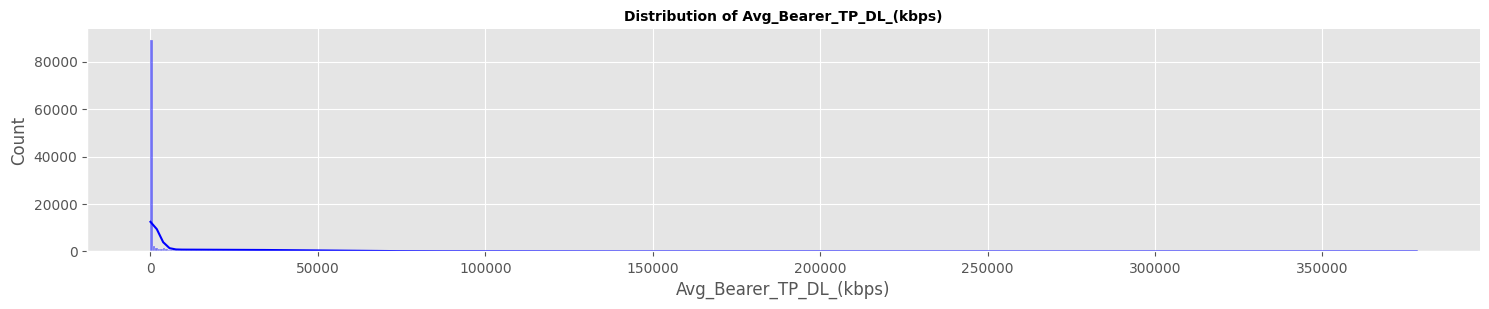

In [205]:
plot_utils.plot_hist(df_cleaned, 'Avg_Bearer_TP_DL_(kbps)', 'blue')

In [206]:
df_cleaned['Avg_Bearer_TP_DL_(kbps)'].describe()

count    150000.000000
mean      13300.045927
std       23971.878541
min           0.000000
25%          43.000000
50%          63.000000
75%       19710.750000
max      378160.000000
Name: Avg_Bearer_TP_DL_(kbps), dtype: float64